In [31]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# データ読み込み
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
alldata = [train, test]

In [3]:
# データ確認
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# データ確認
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# データの基本的な情報を確認
# => 891のデータ数, AgeとCabinとEmbarkedには欠損値がある
dtypes = train.dtypes.to_frame('dtype').T
nulls = train.isnull().sum().to_frame('null').T
notnulls = train.notnull().sum().to_frame('not null').T
dtypes.append([notnulls, nulls])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
not null,891,891,891,891,891,714,891,891,891,891,204,889
null,0,0,0,0,0,177,0,0,0,0,687,2


In [6]:
train.info() # 上記と同等の情報はinfo()でも見れる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# 数値列の統計情報
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 数値列以外の統計情報
train.describe(exclude='number')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cavendish, Mr. Tyrell William",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
# Surviviedと関連のありそうな変数を調査
# => 階級が高い、女性の生存率が高い
train.pivot_table('Survived', index='Pclass', columns='Sex', margins=True)

Sex,female,male,All
Pclass,,,
1,0.968085,0.368852,0.629630
2,0.921053,0.157407,0.472826
3,0.500000,0.135447,0.242363
All,0.742038,0.188908,0.383838


In [10]:
# Ageをパーセンタイルに分割
age_p = pd.cut(train['Age'], 5)
train.pivot_table('Survived', index='Pclass', columns=age_p)

Age,nan,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]"
Pclass,,,,,
1,0.681159,0.166667,0.888889,0.728814,0.534884
2,0.448980,0.000000,0.904762,0.428571,0.352941
3,0.100000,0.000000,0.400000,0.241379,0.111111


In [11]:
# fareを分割
fare_p = pd.qcut(train['Fare'], 3)
train.pivot_table('Survived', index=['Sex', 'Pclass'], columns=fare_p)

Fare           (-0.001, 8.662]  (8.662, 26.0]  (26.0, 512.329]
Sex    Pclass                                                 
female 1                   NaN       0.967391         1.000000
       2                   NaN       1.000000         0.894737
       3               0.62963       0.100000         0.514286
male   1               0.00000       0.401786         0.000000
       2               0.00000       0.200000         0.158537
       3               0.11157       0.187500         0.191781

In [12]:
# 非数値列を数値に変換

(count    714.000000
 mean      29.699118
 std       14.526497
 min        0.420000
 25%       20.125000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: Age, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a6c37b8>)

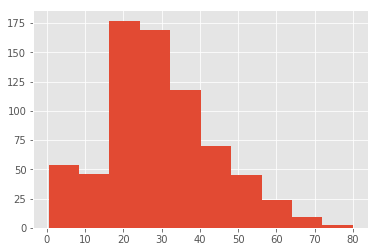

In [13]:
## Age
train['Age'].describe(),train['Age'].hist(),

In [14]:
# Ageの欠損値を平均値で補完
print(train['Age'].isnull().sum())
train['Age'] = train['Age'].fillna(train['Age'].mean())
print(train['Age'].isnull().sum())

177
0


In [15]:
## Cabin

In [16]:
# Cabinの先頭位置文字を取得
train['Cabin-Top'] = train['Cabin'].str[0:1]
train['Cabin-Top'].value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin-Top, dtype: int64

In [17]:
# CabinとPclassとの相関を確認
# => 相関がありそう
pd.crosstab(train['Pclass'], train['Cabin-Top'].fillna('Nan'), dropna=False)

Cabin-Top,A,B,C,D,E,F,G,Nan,T
Pclass,,,,,,,,,
1,15,47,59,29,25,0,0,40,1
2,0,0,0,4,4,8,0,168,0
3,0,0,0,0,3,5,4,479,0


In [18]:
# CabinはA:0, B:1, ... , G:6 とする。たたしTもAと同じ1とする。また欠損値は最頻値の'C'とする。
train['Cabin'] = train['Cabin-Top'].fillna('C').map( {'A': 0, 'B': 1, 'C': 2, 'D':3, 'E':4, 'F':5, 'G':6, 'T': 0} ).astype(int)
train = train.drop('Cabin-Top', axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,S


In [19]:
# Embarkedの欠損値は最頻値 'S' で補完
print(train['Embarked'].value_counts(dropna=False))
print("最頻値:", train['Embarked'].mode()[0])
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
print(train['Embarked'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
最頻値: S
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
# Embarkedを数値に
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [21]:
print(train['Embarked'].value_counts(dropna=False))

0    646
1    168
2     77
Name: Embarked, dtype: int64


In [22]:
# Sexを数値に
train['Sex'] = train['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

In [23]:
# Name, Ticketはdrop
train = train.drop(['Name', 'Ticket'], axis=1)

In [24]:
# データの基本的な情報を確認
# => 全て数値にし、欠損値を除去した
dtypes = train.dtypes.to_frame('dtype').T
nulls = train.isnull().sum().to_frame('null').T
notnulls = train.notnull().sum().to_frame('not null').T
dtypes.append([notnulls, nulls])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtype,int64,int64,int64,int64,float64,int64,int64,float64,int64,int64
not null,891,891,891,891,891,891,891,891,891,891
null,0,0,0,0,0,0,0,0,0,0


In [25]:
# テストデータも同様に
# データの基本的な情報を確認
dtypes = test.dtypes.to_frame('dtype').T
nulls = test.isnull().sum().to_frame('null').T
notnulls = test.notnull().sum().to_frame('not null').T
dtypes.append([notnulls, nulls])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
dtype,int64,int64,object,object,float64,int64,int64,object,float64,object,object
not null,418,418,418,418,332,418,418,418,417,91,418
null,0,0,0,0,86,0,0,0,1,327,0


In [26]:
# テストデータも同様に

## Age
test['Age'] = test['Age'].fillna(train['Age'].mean())
## Cabin
test['Cabin-Top'] = test['Cabin'].str[0:1]
test['Cabin'] = test['Cabin-Top'].fillna('C').map( {'A': 0, 'B': 1, 'C': 2, 'D':3, 'E':4, 'F':5, 'G':6, 'T': 0} ).astype(int)
test = test.drop('Cabin-Top', axis=1)
##  Embarked
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
## Sex
test['Sex'] = test['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
## Name, Ticketはdrop
test = test.drop(['Name', 'Ticket'], axis=1)

In [27]:
# テストデータのみ、Fareにも欠損値があるため、Fareは平均値で補完
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [28]:
# テストデータも同様に
# データの基本的な情報を確認
dtypes = test.dtypes.to_frame('dtype').T
nulls = test.isnull().sum().to_frame('null').T
notnulls = test.notnull().sum().to_frame('not null').T
dtypes.append([notnulls, nulls])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtype,int64,int64,int64,float64,int64,int64,float64,int64,int64
not null,418,418,418,418,418,418,418,418,418
null,0,0,0,0,0,0,0,0,0


In [33]:
# 学習のためのデータ準備
X_train = train.drop(['PassengerId', 'Survived'], axis=1) # トレーニングデータから目的変数をdrop
Y_train = train["Survived"] # トレーニングデータから目的変数を切り出し
X_test  = test.drop("PassengerId", axis=1).copy() # テストデータからPassengerIdをdrop

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [41]:
# ランダムフォレスト
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.54

In [35]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

38.95

In [39]:
# ナイーブベイズ
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.46

In [40]:
# パーセプトロン
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/Users/toshino/.local/share/virtualenvs/jupyter_notebooks-q86MIwox/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


65.32

In [42]:
## ランダムフォレストが高すぎる。。けどいったん提出してみる
# ランダムフォレスト
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
# kaggle提出用アウトプット
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission_rf_20180531.csv', index=False)

In [45]:
# submit
!kaggle competitions submit -c titanic -f 'output/submission_rf_20180531.csv' -m 'random forest'
# pubic score => 0.74162 # 一応チュートリアルより少し上がった

Successfully submitted to Titanic: Machine Learning from Disaster

In [43]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
